In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium


C:\Users\musta\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
pip install buffer

  Using cached wrapt-1.11.2-py3-none-any.whl
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.12.1
    Uninstalling wrapt-1.12.1:
      Successfully uninstalled wrapt-1.12.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Geolocation analysis using GeoPandas

In [4]:
geo_data = pd.read_csv(r"C:\Users\musta\Downloads\Python health data\Demo Health Facilities Geo Data_NHC.csv")

In [5]:
geo_data

Facility Type   Latitude  Longitude
0        Hospital   5.593051   3.697007
1        Hospital  10.017569   9.921846
2        Hospital   7.568808  11.178651
3        Hospital  11.574567  12.594135
4        Hospital   6.093634   9.334975
..            ...        ...        ...
762      Pharmacy  11.844224   9.831699
763      Pharmacy   8.228317   8.502529
764      Pharmacy   8.162100   4.821424
765      Pharmacy   7.568452   8.388384
766      Pharmacy   4.330299  10.229440

[767 rows x 3 columns]

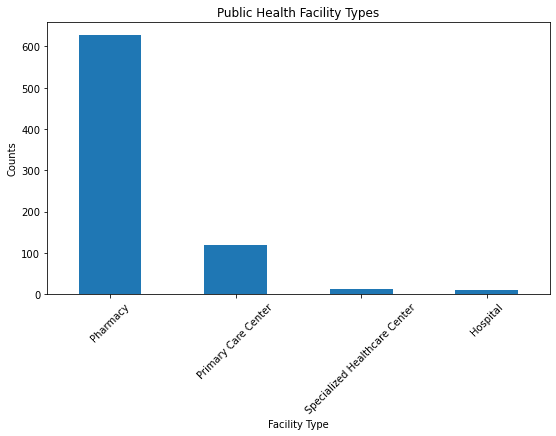

In [6]:
plt.figure(figsize=(9,5))
geo_data['Facility Type'].value_counts().plot(kind = 'bar')
plt.title('Public Health Facility Types')
plt.xlabel('Facility Type')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

In [7]:
gdf = gpd.GeoDataFrame(geo_data, geometry =gpd.points_from_xy(geo_data.Longitude, geo_data.Latitude))

<AxesSubplot:>

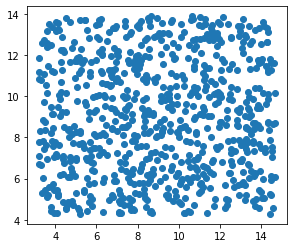

In [8]:
gdf.plot()

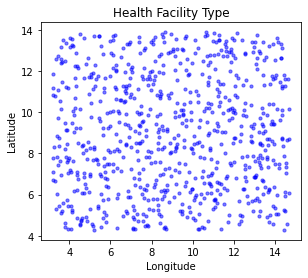

In [9]:
gdf.plot(markersize = 10, color ='blue', alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Health Facility Type')
plt.show()

In [10]:
## Creating Buffers
buffers = gdf.copy()
buffers['geometry'] = gdf.buffer(0.10)

<AxesSubplot:>

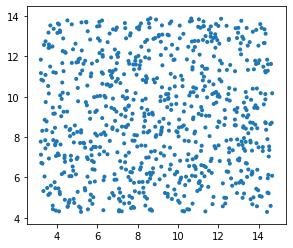

In [11]:
buffers.plot()

<AxesSubplot:>

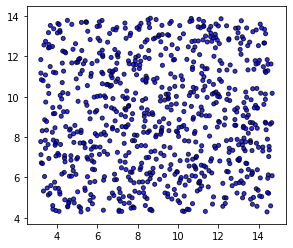

In [12]:
buffers.plot(color = 'blue', edgecolor = 'k', alpha =0.8)

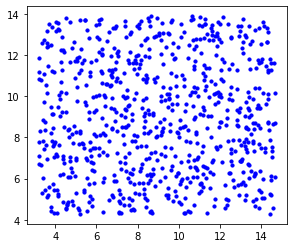

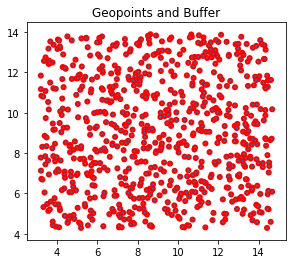

In [13]:
gdf.plot(color = 'blue', markersize=10,label ="Geopoints")
buffers.plot(edgecolor="red", linewidth =2, label ='Buffers')
plt.title("Geopoints and Buffer")
plt.show()

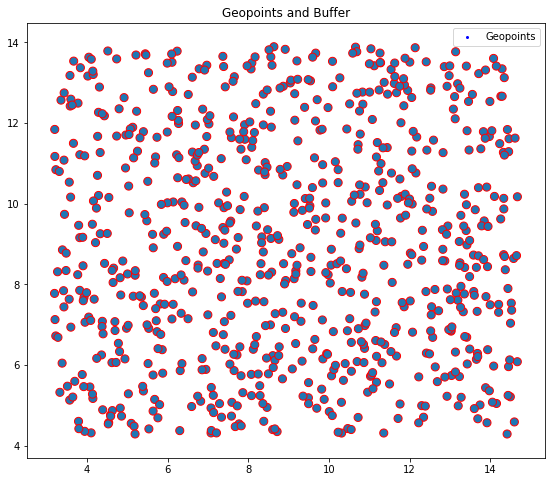

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax, color='blue',markersize=4,label="Geopoints")
buffers.plot(ax=ax, edgecolor='red', linewidth=1,label='Buffers')
plt.legend()
plt.title("Geopoints and Buffer")
plt.show()

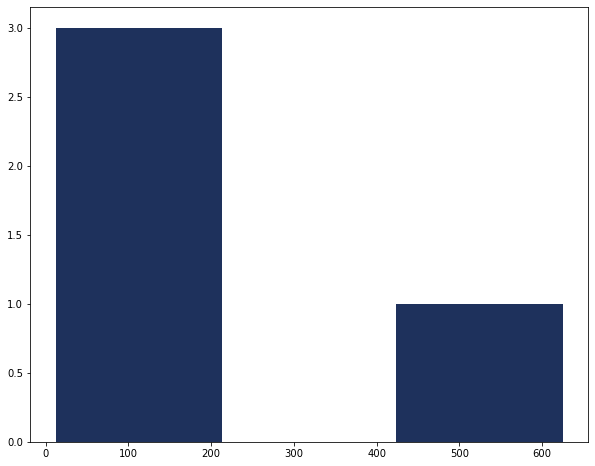

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
n, bin_edges, patches = ax.hist(geo_data['Facility Type'].value_counts(),bins='auto',color='#1E315C', rwidth=0.98)

In [16]:
## Interactive Map for Public Health Facilities Geolocation 
geo_data['Facility Type'].unique()

array(['Hospital', 'Primary Care Center', 'Specialized Healthcare Center',
       'Pharmacy'], dtype=object)

In [17]:
m = folium.Map(location = [geo_data['Latitude'].iloc[0], geo_data['Longitude'][0]])
for index,row in geo_data.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']],popup=row['Facility Type']).add_to(m)
m

In [18]:
facility_color_mapping ={'Hospital':'red', 'Primary Care Center':'blue','Specialized Healthcare Center':'green','Pharmacy':'purple'}

In [19]:
m = folium.Map(location = [geo_data['Latitude'].iloc[0], geo_data['Longitude'][0]])
for index,row in geo_data.iterrows():
    facility_type = row['Facility Type']
    if facility_type in facility_color_mapping:
        color = facility_color_mapping[facility_type]
    else:
        color = 'gray'
    folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Facility Type'],icon=folium.Icon(color=color)).add_to(m)

In [20]:
m

In [21]:
# for index,row in geo_data.iterrows():     Just a cross check on the data info for my understanding.
    #print(row['Facility Type'])

In [22]:
m = folium.Map(location = [geo_data['Latitude'].iloc[0], geo_data['Longitude'][0]])
facility_types_to_visualize = ['Hospital', 'Pharmacy']
filtered_dt = geo_data[geo_data['Facility Type'].isin(facility_types_to_visualize)]

for index, row in filtered_dt.iterrows():
    facility_type =row['Facility Type']
    color = facility_color_mapping.get(facility_type,'grey')
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Facility Type'], icon = folium.Icon(color=color)).add_to(m)

In [23]:
m

In [24]:
from folium.plugins import HeatMap

In [25]:
m = folium.Map(location=[geo_data['Latitude'].iloc[0],geo_data['Latitude'].iloc[0]]) 

In [26]:
heat_data = [[row['Latitude'],row['Longitude']]for index, row in geo_data.iterrows()]
HeatMap(heat_data).add_to(m)

In [27]:
m

In [28]:
m.save('facility_heatmap.html')

In [29]:
from folium.plugins import MarkerCluster

In [30]:
m = folium.Map(location=[geo_data['Latitude'].iloc[0],geo_data['Latitude'].iloc[0]]) 

In [31]:
marker_cluster = MarkerCluster()

for index, row in geo_data.iterrows():
    marker = folium.Marker([row['Latitude'],row['Longitude']], popup=row['Facility Type'])
    marker.add_to(marker_cluster)
    
marker_cluster.add_to(m)

m

In [32]:
from 

SyntaxError: invalid syntax (Temp/ipykernel_17100/681706079.py, line 1)